In [29]:
import fireducks.pandas as pd
import numpy as np

In [25]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [40]:
df_train = df_train.dropna()

In [41]:
def simpleProcessing(df_here):
    # 1. Convert date to datetime
    df_here['date'] = pd.to_datetime(df_here['date'])
    # 2. Log transformation for num_sold
    df_here['num_sold'] = df_here['num_sold'].apply(lambda x: np.log1p(x))
    return df_here

In [43]:
def addingVariables(df_here):
    # Convert date and add essential time features
        df_here['date'] = pd.to_datetime(df_here['date'])
        df_here['year'] = df_here['date'].dt.year
        df_here['month'] = df_here['date'].dt.month
        df_here['day_of_week'] = df_here['date'].dt.dayofweek
        df_here['is_weekend'] = (df_here['day_of_week'] >= 5).astype(int)
        # Store/Product averages (very powerful for sales data)
        store_avg = df_here.groupby('store')['num_sold'].mean().to_dict()
        product_avg = df_here.groupby('product')['num_sold'].mean().to_dict()

        df_here['store_avg_performance'] = df_here['store'].map(store_avg)
        df_here['product_avg_performance'] = df_here['product'].map(product_avg)

In [44]:
simpleProcessing(df_train)
addingVariables(df_train)

In [46]:
df_train.head()

,id,date,country,store,product,num_sold,year,month,day_of_week,is_weekend,store_avg_performance,product_avg_performance
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,6.881411,2010,1,4,0,5.483425,6.540707
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,6.810142,2010,1,4,0,5.483425,6.350640
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,6.049733,2010,1,4,0,5.483425,5.749520
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,6.198479,2010,1,4,0,5.483425,5.895331
5,5,2010-01-01,Canada,Stickers for Less,Holographic Goose,5.707110,2010,1,4,0,6.097865,4.967694


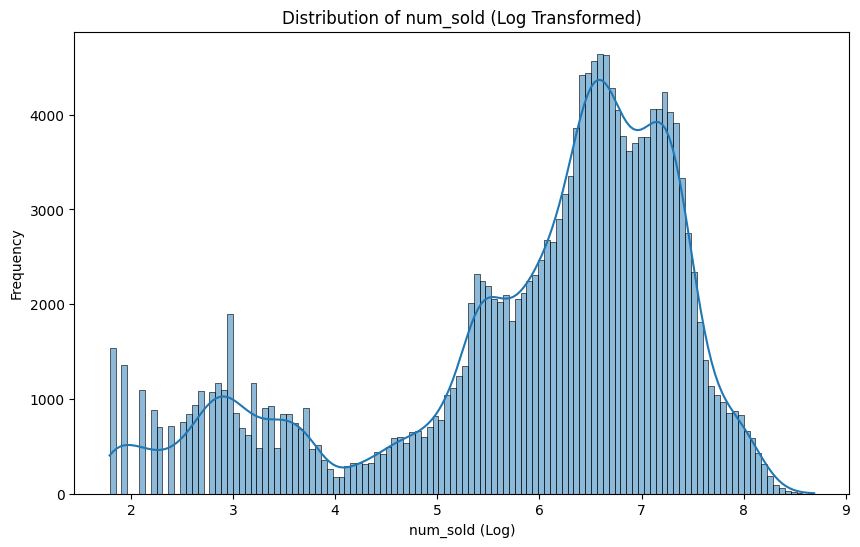

In [48]:
import seaborn as sns

import matplotlib.pyplot as plt

# Visualize the distribution of the target variable 'num_sold'
plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True)
plt.title('Distribution of num_sold (Log Transformed)')
plt.xlabel('num_sold (Log)')
plt.ylabel('Frequency')
plt.show()

### Train-Test Split

In [47]:
from sklearn.model_selection import train_test_split

# Train Test Split
# Define features and target
features = ['year', 'month', 'day_of_week', 'is_weekend', 'store_avg_performance', 'product_avg_performance']
target = 'num_sold'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train[features], df_train[target], test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (177007, 6)
X_test shape: (44252, 6)
y_train shape: (177007,)
y_test shape: (44252,)
